In [31]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_curve, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

## Importing Data

In [2]:
df = pd.read_csv("C:\\Users\\suhas\\Documents\\College Projects\\Leaf-Classification-Medicinal\\features.csv")

In [3]:
del df['Unnamed: 0']
df

,common name,red_mean,red_var,blue_mean,blue_var,green_mean,green_var,area,perimeter,length,width,aspect ratio,form factor,rectangularity,perimeter ratio of length and width,contrast,correlation,entropy,inverse difference moments
0,sorbus aucuparia,175.413117,89.902019,158.223090,118.536284,170.705951,95.692209,2547445.0,18921.339434,3097.903076,1620.005981,1.912279,0.089415,1.970061,4.010535,75.356344,0.995952,9.438853,0.388849
1,sorbus aucuparia,196.430216,79.807680,178.019189,109.838586,192.480699,81.049172,1634514.5,18703.955534,2757.824219,1387.480957,1.987648,0.058713,2.341018,4.512082,57.308815,0.995926,8.980168,0.429019
2,sorbus aucuparia,190.371075,84.645586,175.592140,112.242956,188.752081,85.362662,1738368.0,21407.024849,2702.096924,1579.382568,1.710856,0.047669,2.454972,4.999913,58.240379,0.996254,8.807776,0.435627
3,sorbus aucuparia,185.160308,83.099103,168.328031,111.148373,183.505444,83.465672,2084601.5,19003.685544,1576.593994,2721.065674,0.579403,0.072537,2.057955,4.421868,51.238502,0.996575,9.040451,0.432259
4,sorbus aucuparia,194.484634,76.452251,172.844500,108.608852,194.585816,74.933301,2282467.5,16497.088441,1693.006958,2685.539795,0.630416,0.105390,1.991983,3.767709,56.014063,0.995524,9.293541,0.442648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3027,yew plum pie,238.325835,55.421092,237.629440,57.630225,242.593002,41.559948,155142.5,3169.435093,1484.483887,140.012650,10.602498,0.194078,1.339714,1.951026,9.850830,0.997820,1.460217,0.930480
3028,yew plum pie,235.086392,56.583562,231.701753,65.931880,244.655587,30.072435,208088.0,3749.515389,1751.625732,155.323853,11.277249,0.185997,1.307472,1.966237,10.065629,0.997148,1.880480,0.906011
3029,yew plum pie,241.434539,47.188354,238.358278,57.717060,248.133264,24.358347,141974.5,3270.038124,1522.433594,139.203156,10.936775,0.166846,1.492716,1.967962,6.593927,0.997296,1.357991,0.935189
3030,yew plum pie,243.947001,43.065221,242.001275,50.432570,249.138740,23.235827,114726.5,2826.322395,1344.616089,121.611855,11.056620,0.180480,1.425314,1.927615,5.928906,0.997143,1.145095,0.946968


## Pre-Processing

In [4]:
le = LabelEncoder()

In [5]:
col = []

for c in df.columns:
    col.append(c)
    
y = df[col[0]]
X = df[col[1:]]

In [6]:
scaler = StandardScaler()

In [7]:
df

,common name,red_mean,red_var,blue_mean,blue_var,green_mean,green_var,area,perimeter,length,width,aspect ratio,form factor,rectangularity,perimeter ratio of length and width,contrast,correlation,entropy,inverse difference moments
0,sorbus aucuparia,175.413117,89.902019,158.223090,118.536284,170.705951,95.692209,2547445.0,18921.339434,3097.903076,1620.005981,1.912279,0.089415,1.970061,4.010535,75.356344,0.995952,9.438853,0.388849
1,sorbus aucuparia,196.430216,79.807680,178.019189,109.838586,192.480699,81.049172,1634514.5,18703.955534,2757.824219,1387.480957,1.987648,0.058713,2.341018,4.512082,57.308815,0.995926,8.980168,0.429019
2,sorbus aucuparia,190.371075,84.645586,175.592140,112.242956,188.752081,85.362662,1738368.0,21407.024849,2702.096924,1579.382568,1.710856,0.047669,2.454972,4.999913,58.240379,0.996254,8.807776,0.435627
3,sorbus aucuparia,185.160308,83.099103,168.328031,111.148373,183.505444,83.465672,2084601.5,19003.685544,1576.593994,2721.065674,0.579403,0.072537,2.057955,4.421868,51.238502,0.996575,9.040451,0.432259
4,sorbus aucuparia,194.484634,76.452251,172.844500,108.608852,194.585816,74.933301,2282467.5,16497.088441,1693.006958,2685.539795,0.630416,0.105390,1.991983,3.767709,56.014063,0.995524,9.293541,0.442648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3027,yew plum pie,238.325835,55.421092,237.629440,57.630225,242.593002,41.559948,155142.5,3169.435093,1484.483887,140.012650,10.602498,0.194078,1.339714,1.951026,9.850830,0.997820,1.460217,0.930480
3028,yew plum pie,235.086392,56.583562,231.701753,65.931880,244.655587,30.072435,208088.0,3749.515389,1751.625732,155.323853,11.277249,0.185997,1.307472,1.966237,10.065629,0.997148,1.880480,0.906011
3029,yew plum pie,241.434539,47.188354,238.358278,57.717060,248.133264,24.358347,141974.5,3270.038124,1522.433594,139.203156,10.936775,0.166846,1.492716,1.967962,6.593927,0.997296,1.357991,0.935189
3030,yew plum pie,243.947001,43.065221,242.001275,50.432570,249.138740,23.235827,114726.5,2826.322395,1344.616089,121.611855,11.056620,0.180480,1.425314,1.927615,5.928906,0.997143,1.145095,0.946968


In [8]:
le.fit(y)
species = le.classes_

In [9]:
df['common name'] = le.transform(y)
df

,common name,red_mean,red_var,blue_mean,blue_var,green_mean,green_var,area,perimeter,length,width,aspect ratio,form factor,rectangularity,perimeter ratio of length and width,contrast,correlation,entropy,inverse difference moments
0,35,175.413117,89.902019,158.223090,118.536284,170.705951,95.692209,2547445.0,18921.339434,3097.903076,1620.005981,1.912279,0.089415,1.970061,4.010535,75.356344,0.995952,9.438853,0.388849
1,35,196.430216,79.807680,178.019189,109.838586,192.480699,81.049172,1634514.5,18703.955534,2757.824219,1387.480957,1.987648,0.058713,2.341018,4.512082,57.308815,0.995926,8.980168,0.429019
2,35,190.371075,84.645586,175.592140,112.242956,188.752081,85.362662,1738368.0,21407.024849,2702.096924,1579.382568,1.710856,0.047669,2.454972,4.999913,58.240379,0.996254,8.807776,0.435627
3,35,185.160308,83.099103,168.328031,111.148373,183.505444,83.465672,2084601.5,19003.685544,1576.593994,2721.065674,0.579403,0.072537,2.057955,4.421868,51.238502,0.996575,9.040451,0.432259
4,35,194.484634,76.452251,172.844500,108.608852,194.585816,74.933301,2282467.5,16497.088441,1693.006958,2685.539795,0.630416,0.105390,1.991983,3.767709,56.014063,0.995524,9.293541,0.442648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3027,46,238.325835,55.421092,237.629440,57.630225,242.593002,41.559948,155142.5,3169.435093,1484.483887,140.012650,10.602498,0.194078,1.339714,1.951026,9.850830,0.997820,1.460217,0.930480
3028,46,235.086392,56.583562,231.701753,65.931880,244.655587,30.072435,208088.0,3749.515389,1751.625732,155.323853,11.277249,0.185997,1.307472,1.966237,10.065629,0.997148,1.880480,0.906011
3029,46,241.434539,47.188354,238.358278,57.717060,248.133264,24.358347,141974.5,3270.038124,1522.433594,139.203156,10.936775,0.166846,1.492716,1.967962,6.593927,0.997296,1.357991,0.935189
3030,46,243.947001,43.065221,242.001275,50.432570,249.138740,23.235827,114726.5,2826.322395,1344.616089,121.611855,11.056620,0.180480,1.425314,1.927615,5.928906,0.997143,1.145095,0.946968


In [10]:
df
a = set()
for i in range(len(df)):
    a.add(df.iloc[i]['common name'])
    
len(a)

47

## Splitting into Train and Test

In [11]:
col = []

for c in df.columns:
    col.append(c)

y_fin = df[col[0]]
X_fin= df[col[1:]]
X_train, X_test, y_train, y_test = train_test_split(X_fin, y_fin, stratify=y_fin, random_state = 1)

In [12]:
X_train

,red_mean,red_var,blue_mean,blue_var,green_mean,green_var,area,perimeter,length,width,aspect ratio,form factor,rectangularity,perimeter ratio of length and width,contrast,correlation,entropy,inverse difference moments
1734,178.285596,86.968313,168.043248,98.145944,201.879990,61.091287,842218.0,4251.267361,1062.000000,1124.000000,0.944840,0.585595,1.417315,1.944770,28.689572,0.997296,6.079059,0.634029
610,170.316856,86.436199,136.575586,122.604503,172.452568,79.239779,861547.0,4722.105893,748.839722,1759.724731,0.425544,0.485531,1.529518,1.882394,102.929715,0.993063,10.138767,0.343451
317,175.635325,83.092951,159.182384,103.006404,170.694642,84.213538,1162810.0,6486.644120,1851.393433,1002.662598,1.846477,0.347279,1.596411,2.272781,97.272230,0.993418,9.911068,0.352471
2091,217.821700,74.020217,210.915852,87.293623,241.147208,28.480093,392173.5,2903.790096,1045.754028,560.817627,1.864695,0.584464,1.495454,1.807445,10.605549,0.997751,2.876956,0.837036
141,171.446181,92.057599,149.430606,118.769155,168.056737,91.848722,371817.5,2792.133242,818.826050,687.943237,1.190252,0.599332,1.515006,1.853060,53.681386,0.997021,9.165859,0.398026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,221.832219,64.307209,212.519107,81.582547,245.197223,20.250598,409088.0,3166.233747,529.360168,1223.828857,0.432544,0.512791,1.583635,1.805985,9.831084,0.996933,3.004320,0.833775
1505,206.127662,77.707203,199.666346,87.275500,224.918686,48.136820,546773.0,3697.933443,1614.305542,502.040680,3.215488,0.502457,1.482237,1.747320,23.768134,0.996845,4.039285,0.761465
2433,212.820364,72.863813,206.669107,83.085202,229.409836,44.619228,481750.5,3399.254292,1475.743896,507.218384,2.909484,0.523920,1.553760,1.714230,17.237741,0.997382,3.538097,0.792136
2415,208.237468,71.948078,200.454746,83.179766,230.164670,38.951723,573261.0,3915.746713,1707.487305,539.494080,3.164979,0.469822,1.606911,1.742670,21.840837,0.996214,4.208535,0.749271


In [13]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [14]:
X_train

array([[-0.73425727,  0.4189076 , -0.48512215, ...,  0.47677417,
        -0.02971339,  0.07388857],
       [-1.11478839,  0.37974911, -1.6902012 , ..., -1.64255469,
         1.54373582, -1.52750233],
       [-0.86081563,  0.13371817, -0.82445596, ..., -1.46473201,
         1.45548482, -1.47779221],
       ...,
       [ 0.91488108, -0.61904818,  0.99408574, ...,  0.52018744,
        -1.01453142,  0.9452257 ],
       [ 0.69603411, -0.68643751,  0.75610184, ..., -0.0647713 ,
        -0.75468508,  0.70899387],
       [-0.42323477,  0.58400333, -0.26449533, ...,  0.48798814,
         1.10744362, -1.03116019]])

# KNN

Took weights as `distance` as `distance` sets weight inversely proportional to distance from current observation. Gives a degree of similarity compared to uniform weights

In [15]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', n_jobs=-1)

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, weights='distance')

In [17]:
knn.score(X_test, y_test)

0.8746701846965699

In [18]:
scores = dict()

In [19]:
for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance', n_jobs=-1)
    knn.fit(X_train, y_train)
    scores[i] = knn.score(X_test, y_test)

In [20]:
scores

{1: 0.8852242744063324,
 2: 0.8852242744063324,
 3: 0.8707124010554089,
 4: 0.8746701846965699,
 5: 0.8746701846965699,
 6: 0.8786279683377308,
 7: 0.8720316622691293,
 8: 0.8759894459102903,
 9: 0.866754617414248,
 10: 0.8746701846965699}

Took `n=2` instead of lower numbers as higher numbers give it more stability

In [21]:
n = 6 

In [22]:
knn = KNeighborsClassifier(n_neighbors=n, weights='distance', n_jobs=-1)

In [23]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=6, weights='distance')

In [24]:
knn.score(X_test, y_test)

0.8786279683377308

In [25]:
y_pred = knn.predict(X_test)

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.95      1.00      0.97        19
           2       0.75      0.75      0.75        16
           3       0.85      0.79      0.81        14
           4       0.89      0.89      0.89        19
           5       0.67      0.83      0.74        12
           6       0.62      0.62      0.62        16
           7       0.81      0.81      0.81        16
           8       1.00      0.92      0.96        13
           9       0.54      0.50      0.52        14
          10       0.93      0.88      0.90        16
          11       0.75      1.00      0.86        18
          12       0.80      1.00      0.89        16
          13       0.91      0.77      0.83        13
          14       0.93      0.93      0.93        15
          15       1.00      1.00      1.00        19
          16       0.90      0.95      0.92        19
          17       0.91    

## Confusion Matrix

In [28]:
pred = knn.predict(X_test)

In [32]:
conf = confusion_matrix(y_test, pred)

<AxesSubplot:>

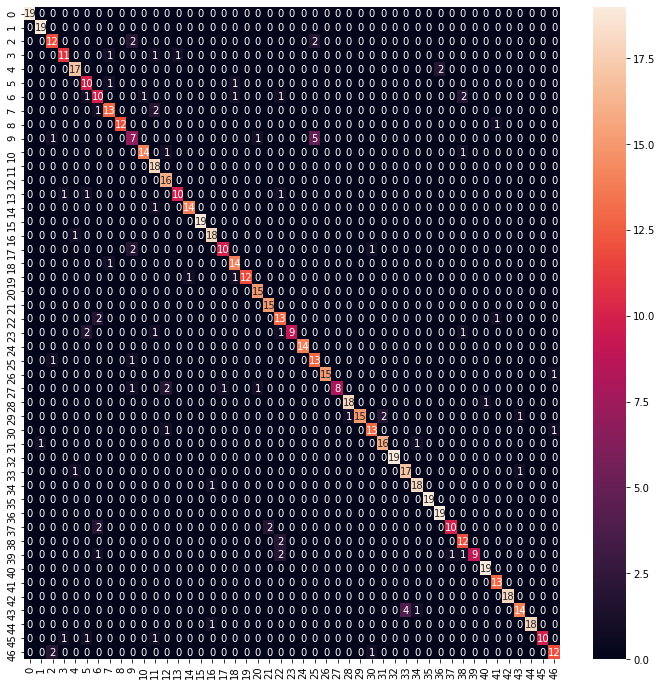

In [34]:
plt.figure(figsize=(12, 12))
sns.heatmap(conf, annot = True)